## Aprendizado Não Supervisionado - Redução de Dimensionalidade
#### Prof. Thomas da Silva Paula

### PCA - Demo 1

* Utilização do algoritmo PCA em caso de uso simples.
* Base de dados Iris, muito comum para exemplos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

### Carregar a base de dados e inspecionar algumas informações

In [2]:
df = pd.read_csv('../datasets/iris/iris.data')
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Neste exemplo, vamos usar todas as colunas
df_train = df[df.columns[:4]]
df_labels = df[df.columns[4]]

df_train.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Aplicar PCA

In [4]:
pca = PCA()
pca.fit(df_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Avaliar variância

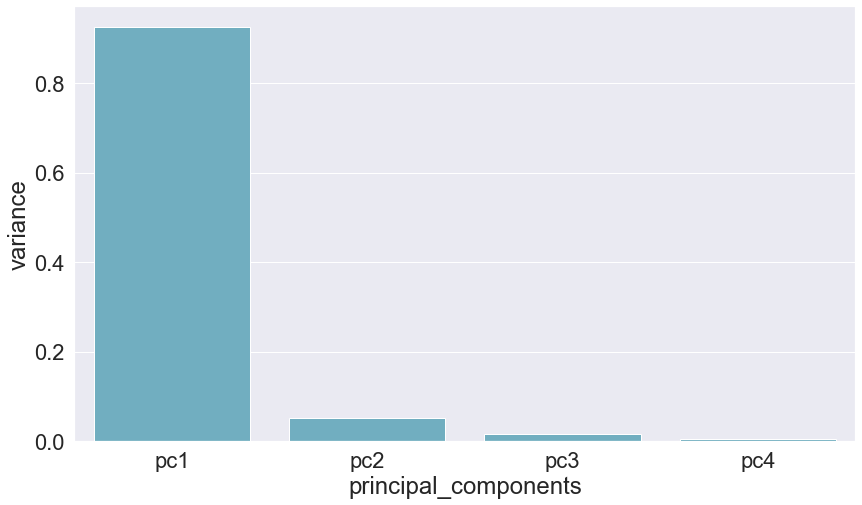

In [5]:
data = {'variance':pca.explained_variance_ratio_, 'principal_components':['pc1','pc2','pc3','pc4']}

df_variance = pd.DataFrame(data)
sns.barplot(x='principal_components',y='variance', data=df_variance, color='c');

In [6]:
df_train_transformed = pca.fit_transform(df_train)
df_train_transformed = pd.DataFrame(df_train_transformed, columns=['pc1','pc2', 'pc3', 'pc4'])
df_train_transformed.head()

,pc1,pc2,pc3,pc4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


### Plotar resultados

In [7]:
def plot_with_principal_components(dim_x, dim_y, df_train):
    columns_names = df_train.columns
    
    xs = df_train_transformed[df_train_transformed.columns[dim_x]]
    ys = df_train_transformed[df_train_transformed.columns[dim_y]]

    color_dict = {
        'Iris-setosa': 'blue',
        'Iris-versicolor': 'green',
        'Iris-virginica': 'orange'
    }


    for (x, y, l) in zip(xs, ys, df_labels):
        _ = plt.scatter(x, y, alpha=0.8, color=color_dict[l])

    _ = plt.xlabel(columns_names[dim_x])
    _ = plt.ylabel(columns_names[dim_y])

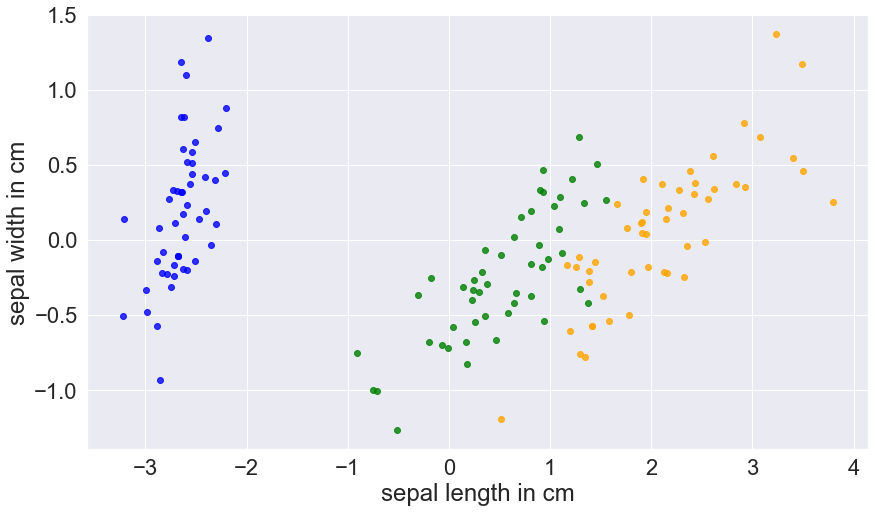

In [8]:
# PC1 e PC2
plot_with_principal_components(0, 1, df_train)

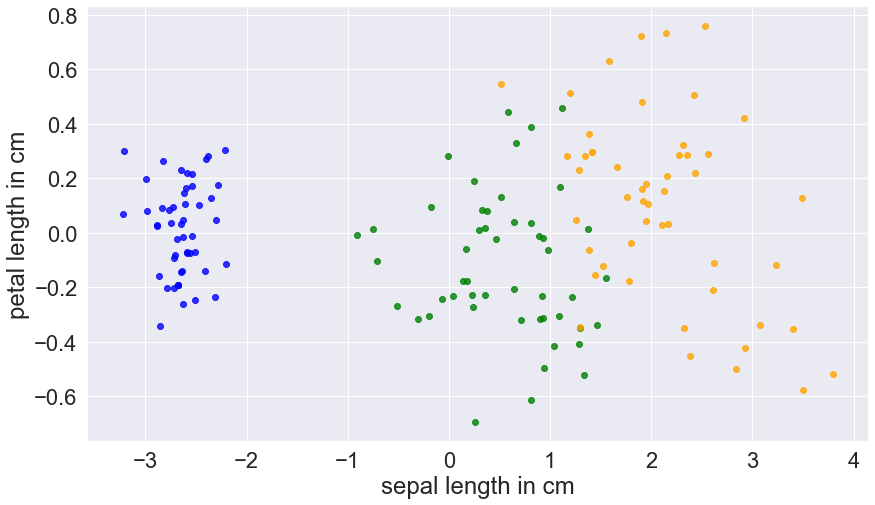

In [9]:
# PC1 e PC3
plot_with_principal_components(0, 2, df_train)

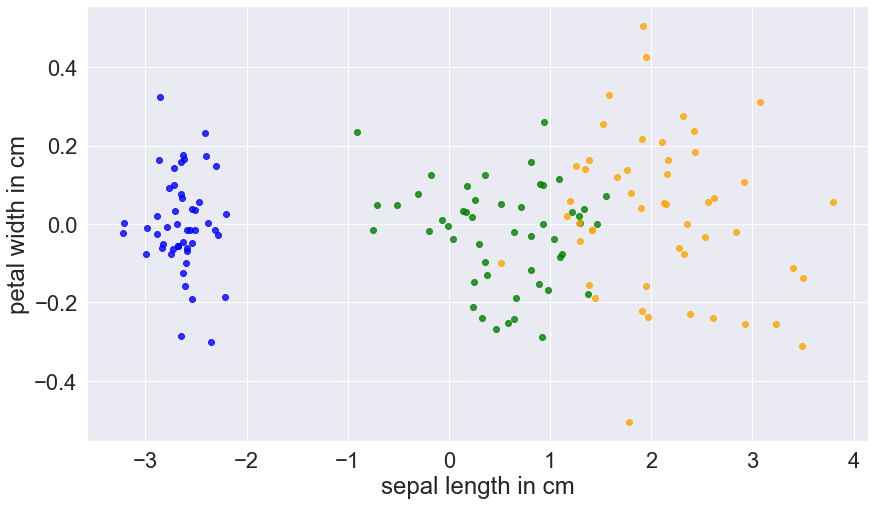

In [10]:
# PC1 e PC4
plot_with_principal_components(0, 3, df_train)

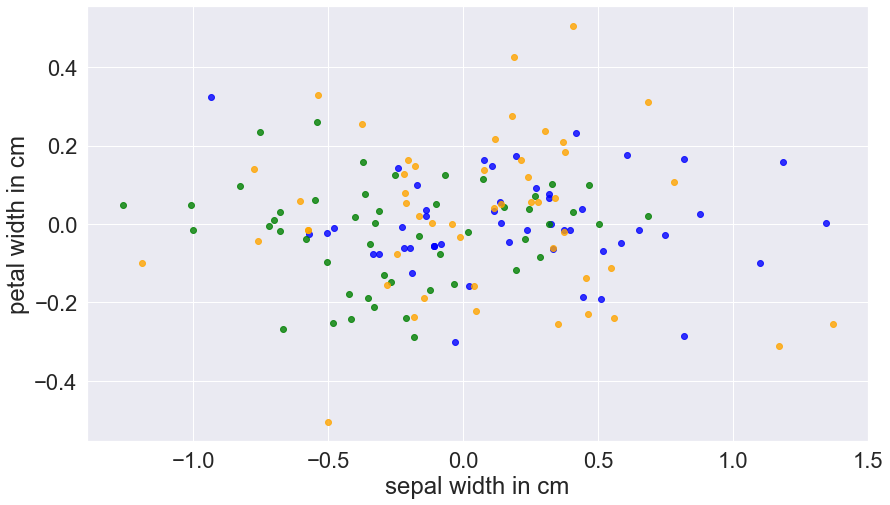

In [11]:
# PC2 e PC3
plot_with_principal_components(1, 3, df_train)